In [20]:
# Dependencies

from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from pprint import pprint

In [21]:
forest_dataframe = pd.read_csv('annual-forest-expansion.csv')

south_america = forest_dataframe.loc[(forest_dataframe["Entity"] == "Brazil") | (forest_dataframe["Entity"] == "Colombia") | \
 (forest_dataframe["Entity"] == "Argentina") | (forest_dataframe["Entity"] == "Cuba") | (forest_dataframe["Entity"] == "Ecuador") | \
 (forest_dataframe["Entity"] == "Peru") | (forest_dataframe["Entity"] == "Uruguay") | (forest_dataframe["Entity"] == "Venezuela") | \
  (forest_dataframe["Entity"] == "Mexico"), ["Entity", "Year", "Forest expansion"]]
south_america

,Entity,Year,Forest expansion
7,Argentina,1990,31000.0
8,Argentina,2000,11000.0
9,Argentina,2010,19000.0
10,Argentina,2015,30000.0
50,Brazil,1990,473860.0
51,Brazil,2000,1178510.0
52,Brazil,2010,328620.0
53,Brazil,2015,242660.0
89,Colombia,1990,6870.0
90,Colombia,2000,21560.0


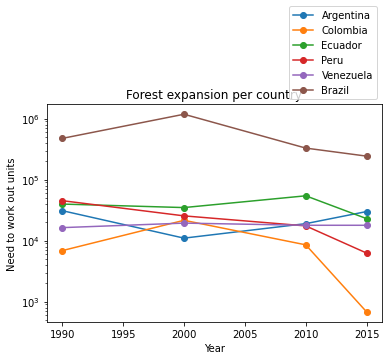

In [27]:
argentina = south_america.loc[south_america['Entity'] == 'Argentina']
brazil = south_america.loc[south_america['Entity'] == 'Brazil']
colombia = south_america.loc[south_america['Entity'] == 'Colombia']
ecuador = south_america.loc[south_america['Entity'] == 'Ecuador']
mexico = south_america.loc[south_america['Entity'] == 'Mexico']
peru = south_america.loc[south_america['Entity'] == 'Peru']
venezuela = south_america.loc[south_america['Entity'] == 'Venezuela']

plt.plot(argentina["Year"], argentina["Forest expansion"], marker='o')
plt.plot(colombia["Year"], colombia["Forest expansion"], marker='o')
plt.plot(ecuador["Year"], ecuador["Forest expansion"], marker='o')
plt.plot(peru["Year"], peru["Forest expansion"], marker='o')
plt.plot(venezuela["Year"], venezuela["Forest expansion"], marker='o')
plt.plot(brazil["Year"], brazil["Forest expansion"], marker='o')

labels = ['Argentina', 'Colombia', 'Ecuador', 'Peru', 'Venezuela', 'Brazil']
plt.legend(labels, bbox_to_anchor=(1.0, 1), loc='lower right')
plt.title("Forest expansion per country")
plt.xlabel("Year")
plt.ylabel("Need to work out units")
plt.yscale('log')
plt.savefig("Images/South America Forest Expansion.png")

In [28]:
afforestation_dataframe = pd.read_csv('data/annual-afforestation.csv')
afforestation_dataframe.groupby('Entity')

sa_afforestation = afforestation_dataframe.loc[(afforestation_dataframe["Entity"] == "Brazil") | (afforestation_dataframe["Entity"] == "Colombia") | \
 (afforestation_dataframe["Entity"] == "Argentina") | (afforestation_dataframe["Entity"] == "Cuba") | (afforestation_dataframe["Entity"] == "Ecuador") | \
 (afforestation_dataframe["Entity"] == "Peru") | (afforestation_dataframe["Entity"] == "Uruguay") | (afforestation_dataframe["Entity"] == "Venezuela") | \
  (afforestation_dataframe["Entity"] == "Mexico"), ["Entity", "Year", "Afforestation"]]

sa_afforestation

,Entity,Year,Afforestation
5,Argentina,1990,23000.0
6,Argentina,2000,7000.0
7,Argentina,2010,13000.0
8,Argentina,2015,21000.0
67,Colombia,1990,6870.0
68,Colombia,2000,21560.0
69,Colombia,2010,8540.0
70,Colombia,2015,680.0
196,Mexico,1990,780.0
197,Mexico,2000,2710.0


In [29]:

increase = sa_afforestation.groupby('Entity').sum('Afforestation')
increase = increase.drop(columns=['Year'])
increase

,Afforestation
Entity,
Argentina,64000.0
Colombia,37650.0
Mexico,10300.0
Peru,94400.0
Uruguay,53400.0
Venezuela,71480.0


In [30]:
increase['Percentage of Land Size'] = [0.02301827075, 0.03297575296, 0.00522047643, 0.07345068844, 0.30303890134, 0.07799704292]
increase_percent = increase["Percentage of Land Size"]
increase_percent

#as percentage of land space

# venezuela = 0.07799704292
# uruguay = 0.30303890134
# peru = 0.07345068844
# mexico = 0.00522047643
# colombia = 0.03297575296
# argentina = 0.02301827075

Entity
Argentina    0.023018
Colombia     0.032976
Mexico       0.005220
Peru         0.073451
Uruguay      0.303039
Venezuela    0.077997
Name: Percentage of Land Size, dtype: float64

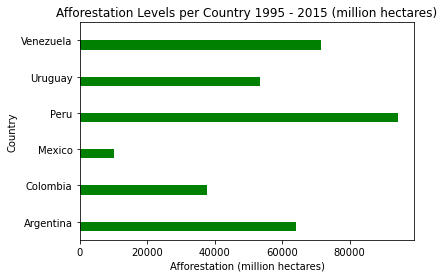

In [31]:
afforestation_plot = increase.plot.barh(ylabel='Afforestation', color='green', title='Afforesation Levels per Country 1995-2015', legend=None)
plt.xlabel("Afforestation (million hectares)")
plt.ylabel("Country")
plt.title("Afforestation Levels per Country 1995 - 2015 (million hectares)")
plt.savefig("Images/Afforestation Levels per country.png")

# afforestation_percent = increase_percent.plot.barh(ylabel='Afforestation', color='green', title='Afforesation Levels per Country 1995-2015', legend=None)
# plt.xlabel("Afforestation (million hectares)")
# plt.ylabel("Country")

TypeError: barh() missing 1 required positional argument: 'width'

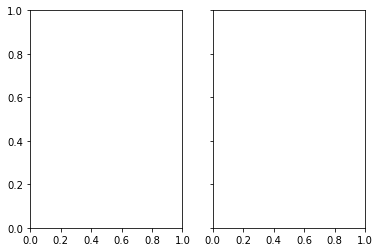

In [32]:
fig, axes = plt.subplots(ncols=2, sharey=True)
axes[0].barh(increase, ylabel='Afforestation', color='green', title='Afforesation Levels per Country 1995-2015', legend=None)
axes[0].set(title='("Afforestation ($-$ million hectares)")')
axes[1].barh(increase_percent, ylabel='Afforestation', color='green', title='Afforesation Levels per Country 1995-2015', legend=None)
axes[1].set(title='Afforestation as percentage of total land area')

# axes[0].invert_xaxis()
# axes[0].set(yticks=y, yticklabels='Countries')
# axes[0].yaxis.tick_right()

for ax in axes.flat:
    ax.margins(0.03)
    ax.grid(True)

fig.tight_layout()
fig.subplots_adjust(wspace=0.09)
plt.show()

In [ ]:
url = "https://api.resourcewatch.org/v1/gfw-metadata/widget_primary_forest_loss"